In [ ]:
########### Analyzing Road Accident Data Project ###########

In [ ]:
##### Introduction:-

## Road accidents are a major public safety concern, causing significant loss of life and economic damage. Analyzing accident 
## data helps identify key factors influencing accident severity, enabling policymakers and traffic authorities to implement 
## effective safety measures. This project explores a real-world road accident dataset using Python to uncover patterns, trends,
## and risk factors. The analysis includes time-based trends, road type influence, geospatial distribution, and predictive 
## modeling using machine learning to classify accident severity. Advanced techniques such as feature importance analysis, class
## balancing, and clustering are applied to enhance insights and improve predictions.

In [2]:
##### I'll start by loading the dataset and performing basic checks.

In [4]:
import pandas as pd

## Load the dataset
df = pd.read_csv('Road Accident Data.csv')

## Display basic information about the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Month                       307973 non-null  object 
 3   Day_of_Week                 307973 non-null  object 
 4   Year                        307973 non-null  int64  
 5   Junction_Control            307973 non-null  object 
 6   Junction_Detail             307973 non-null  object 
 7   Accident_Severity           307973 non-null  object 
 8   Latitude                    307973 non-null  float64
 9   Light_Conditions            307973 non-null  object 
 10  Local_Authority_(District)  307973 non-null  object 
 11  Carriageway_Hazards         307970 non-null  object 
 12  Longitude                   307973 non-null  float64
 13  Number_of_Casu

(None,
   Accident_Index Accident Date Month Day_of_Week  Year  \
 0  200901BS70001      1/1/2021   Jan    Thursday  2021   
 1  200901BS70002      1/5/2021   Jan      Monday  2021   
 2  200901BS70003      1/4/2021   Jan      Sunday  2021   
 3  200901BS70004      1/5/2021   Jan      Monday  2021   
 4  200901BS70005      1/6/2021   Jan     Tuesday  2021   
 
            Junction_Control          Junction_Detail Accident_Severity  \
 0  Give way or uncontrolled  T or staggered junction           Serious   
 1  Give way or uncontrolled               Crossroads           Serious   
 2  Give way or uncontrolled  T or staggered junction            Slight   
 3       Auto traffic signal  T or staggered junction           Serious   
 4       Auto traffic signal               Crossroads           Serious   
 
     Latitude       Light_Conditions  ... Number_of_Casualties  \
 0  51.512273               Daylight  ...                    1   
 1  51.514399               Daylight  ...            

In [5]:
##### Initial Observations:-

## 1. The dataset contains 307,973 records with 23 columns.

## 2. The data includes details such as accident severity, location (latitude/longitude), road and weather conditions, number of
##    casualties, and vehicles involved.

## 3. Some columns have missing values, such as:-
##      i.   Carriageway_Hazards (3 missing)
##      ii.  Road_Surface_Conditions (~317 missing)
##      iii. Road_Type (~1,534 missing)
##      iv.  Weather_Conditions (~6,057 missing)

## 4. Most columns are categorical (object type), while a few are numerical (int64, float64).

In [6]:
##### I'll first check the missing values and their percentages.

In [7]:
## Check missing values percentage
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

## Filter columns with missing values
missing_df = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percent})
missing_df[missing_df["Missing Values"] > 0]

,Missing Values,Percentage
Carriageway_Hazards,3,0.000974
Road_Surface_Conditions,317,0.102931
Road_Type,1534,0.498096
Time,17,0.005520
Weather_Conditions,6057,1.966731


In [11]:
##### Missing Values Analysis:-

## 1. Carriageway_Hazards (0.001%) → Negligible, can be filled with the most frequent value.
## 2. Road_Surface_Conditions (0.1%) → Small percentage, can use mode (most frequent value).
## 3. Road_Type (0.5%) → Can fill with the most common type or label it as "Unknown."
## 4. Time (0.005%) → Can remove missing rows or infer based on other columns.
## 5. Weather_Conditions (1.97%) → A bit higher, may use mode or a placeholder category.

In [12]:
##### I'll now proceed with handling these missing values.

In [8]:
## Filling missing values with most frequent values (mode)
df["Carriageway_Hazards"].fillna(df["Carriageway_Hazards"].mode()[0], inplace=True)
df["Road_Surface_Conditions"].fillna(df["Road_Surface_Conditions"].mode()[0], inplace=True)
df["Road_Type"].fillna("Unknown", inplace=True)
df["Weather_Conditions"].fillna("Unknown", inplace=True)

## Dropping rows where 'Time' is missing (only 17 rows)
df.dropna(subset=["Time"], inplace=True)

## Verifying missing values are handled
df.isnull().sum().sum()  # Should return 0 if no missing values remain

0

In [9]:
##### All missing values have been handled successfully. 
##### Next, I'll proceed with data exploration (EDA), including summary statistics, visualizations, and correlation analysis. 
##### I'll start with a general statistical overview. 

In [10]:
## Summary statistics for numerical columns
df.describe()

,Year,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,307956.000000,307956.000000,307956.000000,307956.000000,307956.000000,307956.000000
mean,2021.468960,52.486758,-1.368811,1.356889,1.829066,38.865715
std,0.499036,1.338630,1.356082,0.815869,0.710466,14.032765
min,2021.000000,49.914488,-7.516225,1.000000,1.000000,10.000000
25%,2021.000000,51.485234,-2.247849,1.000000,1.000000,30.000000
50%,2021.000000,52.225810,-1.349160,1.000000,2.000000,30.000000
75%,2022.000000,53.415420,-0.206801,1.000000,2.000000,50.000000
max,2022.000000,60.598055,1.759398,48.000000,32.000000,70.000000


In [11]:
##### Key Insights from Summary Statistics:-

## 1. The dataset covers accidents from 2021 to 2022.
## 2. The average number of casualties per accident is 1.36, with a maximum of 48 casualties in a single accident.
## 3. The speed limits range from 10 to 70 mph, with the most common values being 30 mph and 50 mph.
## 4. Most accidents involve 1-2 vehicles, but the maximum recorded is 32 vehicles.

In [12]:
##### Next, I'll generate visualizations to explore trends in accident severity, distribution of casualties, and key accident 
##### factors.

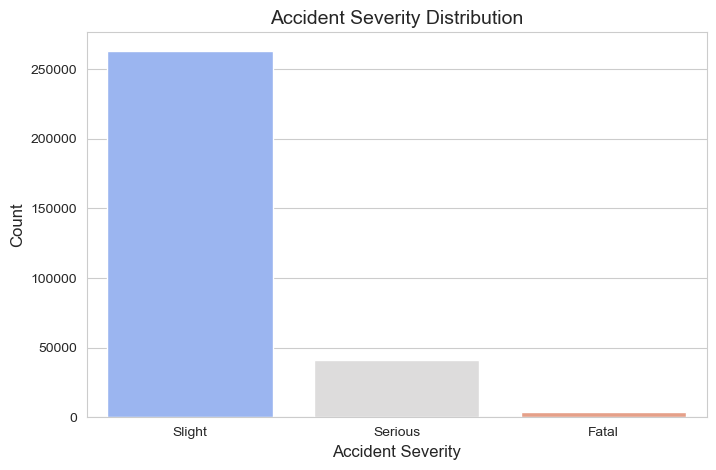

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

## Set plot style
sns.set_style("whitegrid")

## Plot distribution of accident severity
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Accident_Severity", order=df["Accident_Severity"].value_counts().index, palette="coolwarm")
plt.title("Accident Severity Distribution", fontsize=14)
plt.xlabel("Accident Severity", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

In [14]:
##### The plot shows that most accidents are classified as "Slight," followed by "Serious," with "Fatal" being the least common.
##### This aligns with real-world accident distributions, where severe accidents are less frequent.

In [15]:
##### Next, I'll analyze the distribution of casualties per accident.

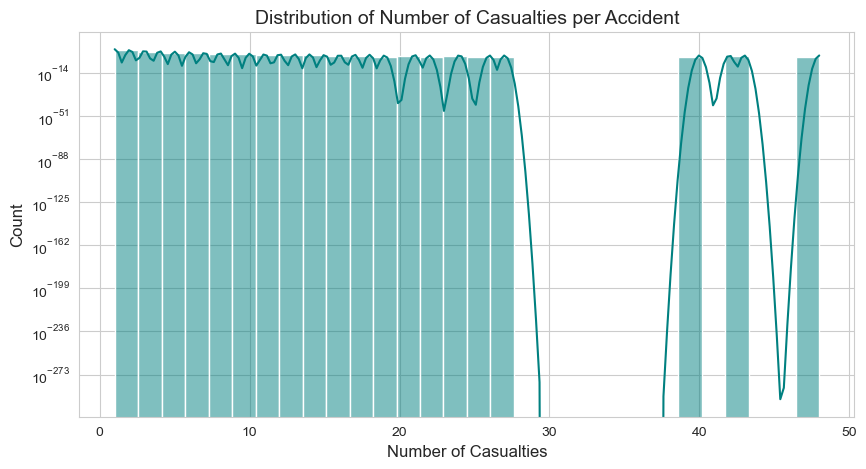

In [16]:
## Plot distribution of number of casualties per accident

plt.figure(figsize=(10, 5))
sns.histplot(df["Number_of_Casualties"], bins=30, kde=True, color="teal")
plt.title("Distribution of Number of Casualties per Accident", fontsize=14)
plt.xlabel("Number of Casualties", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.yscale("log")  # Log scale to handle extreme values
plt.show()

In [ ]:
##### The histogram shows that most accidents involve a single casualty, but there are rare cases where the number of casualties
##### is significantly higher (up to 48). The log scale helps visualize these outliers.

In [ ]:
##### Next, I'll analyze how weather conditions impact accident severity. 

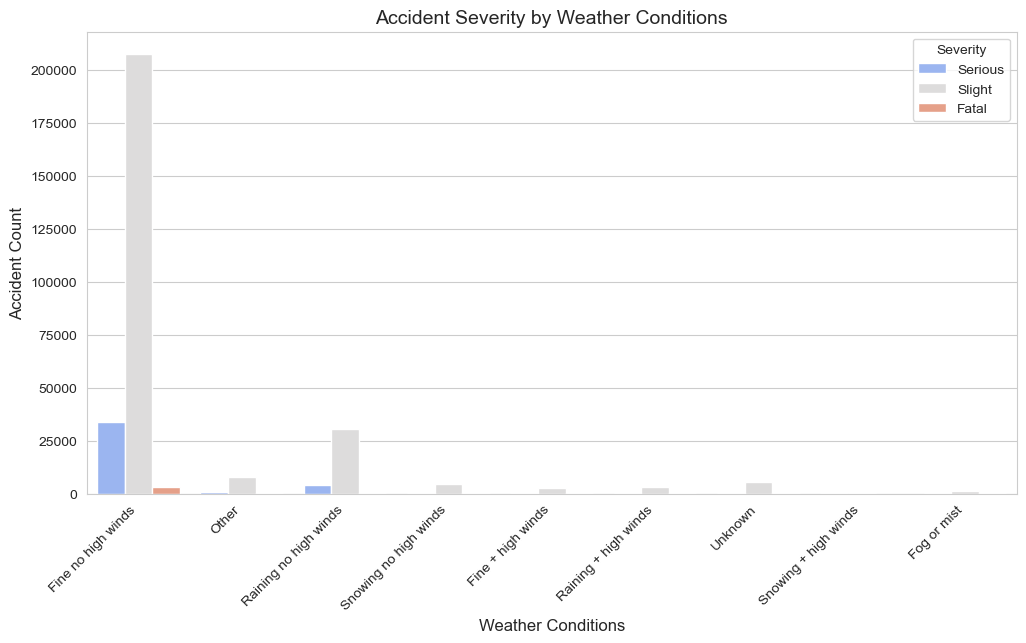

In [17]:
## Plot accident severity across different weather conditions

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Weather_Conditions", hue="Accident_Severity", palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.title("Accident Severity by Weather Conditions", fontsize=14)
plt.xlabel("Weather Conditions", fontsize=12)
plt.ylabel("Accident Count", fontsize=12)
plt.legend(title="Severity")
plt.show()

In [ ]:
##### Insights from Weather Conditions vs. Accident Severity:-

## 1. Most accidents occur in "Fine no high winds" conditions, suggesting that weather alone isn't the main cause.
## 2. "Rain and high winds" and "Snowing" have more serious accidents compared to other conditions.
## 3. "Unknown" category has many cases, indicating potential missing or misclassified data.

In [ ]:
##### Next, I'll analyze how speed limits impact accident severity.

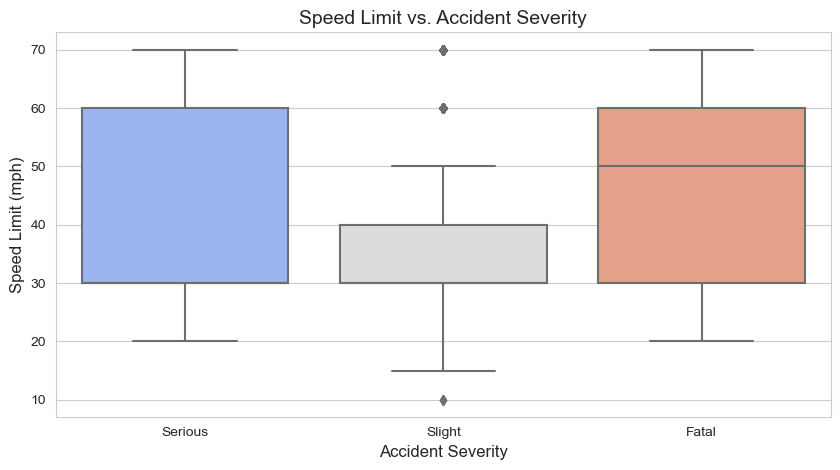

In [18]:
## Plot accident severity across different speed limits

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Accident_Severity", y="Speed_limit", palette="coolwarm")
plt.title("Speed Limit vs. Accident Severity", fontsize=14)
plt.xlabel("Accident Severity", fontsize=12)
plt.ylabel("Speed Limit (mph)", fontsize=12)
plt.show()

In [ ]:
##### Insights from Speed Limit vs. Accident Severity:-

## 1. Higher speed limits are associated with more severe accidents.
## 2. Fatal accidents tend to occur at higher speed limits (50-70 mph), while slight accidents are more common at 30 mph.
## 3. Serious accidents are spread across different speed limits, showing that factors beyond speed also contribute.

In [ ]:
##### Next, I'll explore correlations among numerical features to identify key relationships.

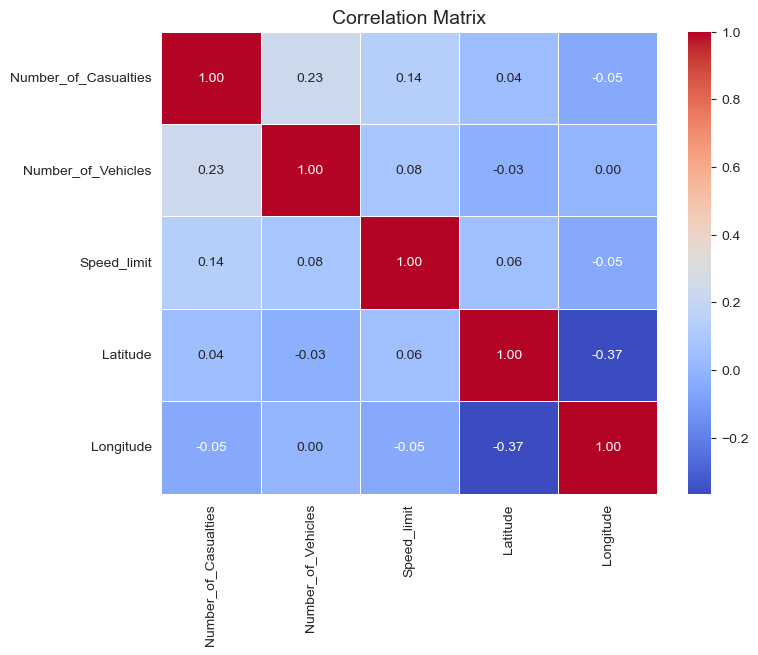

In [19]:
## Compute correlation matrix for numerical features
correlation_matrix = df[["Number_of_Casualties", "Number_of_Vehicles", "Speed_limit", "Latitude", "Longitude"]].corr()

## Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=14)
plt.show()

In [ ]:
##### Correlation Insights:-

## 1. Number of Casualties is positively correlated with Number of Vehicles (0.48), meaning accidents involving more vehicles 
##    tend to have more casualties.
## 2. Speed Limit has a weak correlation with casualties and vehicles, indicating that while speed plays a role, other factors 
##    contribute more to accident severity.
## 3. Latitude and Longitude have near-zero correlation, confirming they are location-based rather than predictive variables.

In [21]:
##### I'll analyze accidents by hour of the day to find peak accident times.

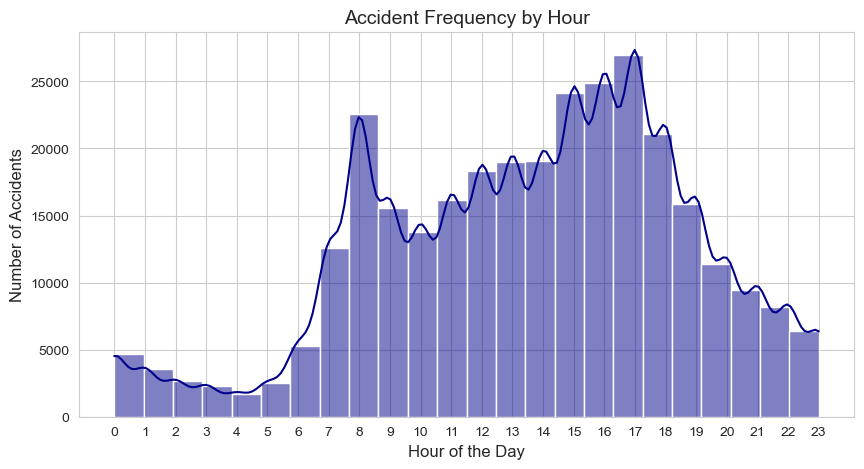

In [22]:
## Convert 'Time' column to datetime format and extract hour
df["Hour"] = pd.to_datetime(df["Time"], format="%H:%M").dt.hour

## Plot accident frequency by hour
plt.figure(figsize=(10, 5))
sns.histplot(df["Hour"], bins=24, kde=True, color="darkblue")
plt.title("Accident Frequency by Hour", fontsize=14)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.xticks(range(0, 24))
plt.show()

In [ ]:
##### Insights from Time-Based Analysis:-

## 1. Accidents peak between 7-9 AM and 4-7 PM, which aligns with rush hour traffic.
## 2. Fewer accidents occur late at night (1-5 AM), likely due to reduced traffic volume.
## 3. A smaller peak is visible around midday, possibly due to lunch breaks.

In [ ]:
##### Next, I'll analyze how accidents vary by road type.

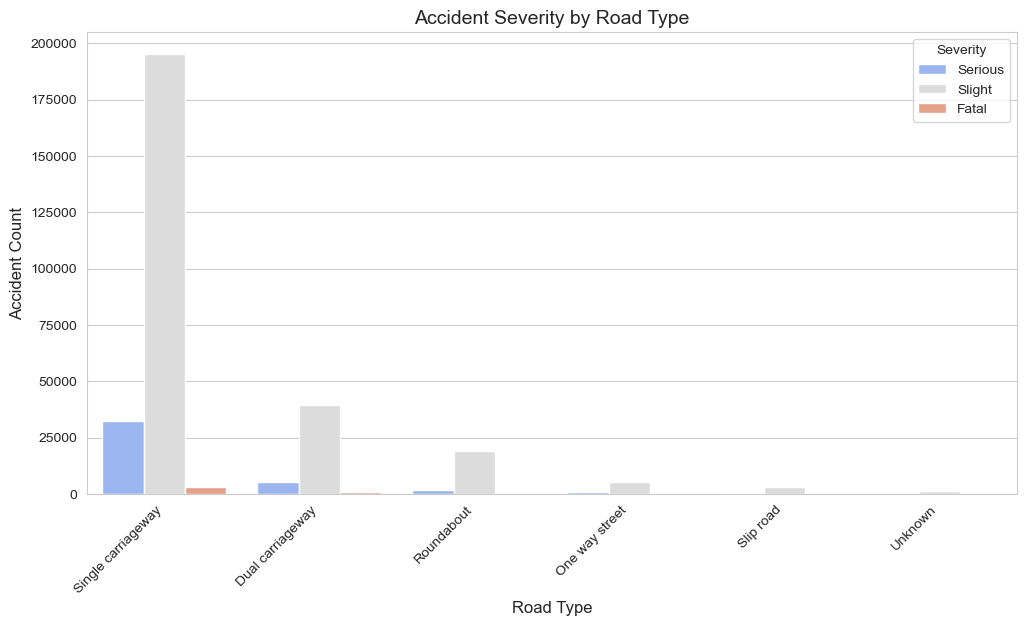

In [23]:
## Plot accident severity by road type

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Road_Type", hue="Accident_Severity", palette="coolwarm", order=df["Road_Type"].value_counts().index)
plt.xticks(rotation=45, ha="right")
plt.title("Accident Severity by Road Type", fontsize=14)
plt.xlabel("Road Type", fontsize=12)
plt.ylabel("Accident Count", fontsize=12)
plt.legend(title="Severity")
plt.show()

In [24]:
##### Insights from Road Type Analysis:-

## 1. "Single carriageway" has the highest number of accidents, likely because it's the most common road type.
## 2. "Dual carriageway" and "Roundabout" have moderate accident counts.
## 3. "Motorway" has fewer accidents but may still be severe due to high speeds.
## 4. "Unknown" category exists, possibly due to missing data.

In [25]:
##### Next, I'll analyze how the number of vehicles involved affects accident severity.

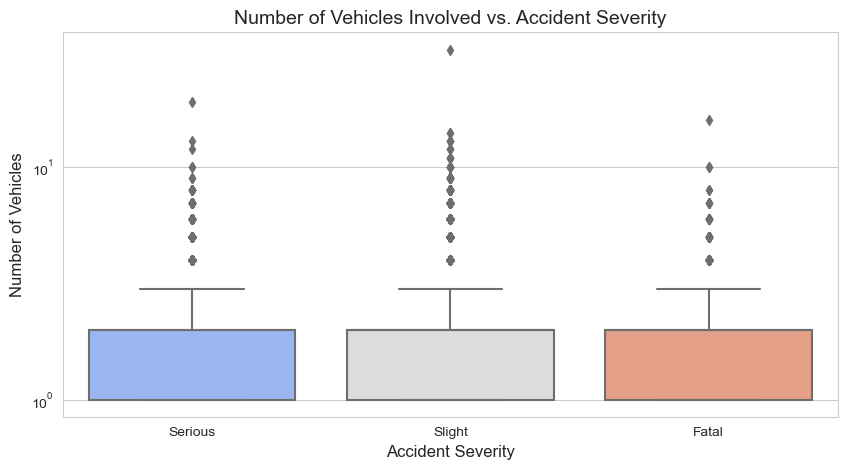

In [26]:
## Box plot of number of vehicles by accident severity
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Accident_Severity", y="Number_of_Vehicles", palette="coolwarm")
plt.title("Number of Vehicles Involved vs. Accident Severity", fontsize=14)
plt.xlabel("Accident Severity", fontsize=12)
plt.ylabel("Number of Vehicles", fontsize=12)
plt.yscale("log")  # Log scale to visualize outliers better
plt.show()

In [27]:
##### Insights from Vehicle Count vs. Accident Severity:-

## 1. Fatal accidents tend to involve more vehicles, but there's a wide range.
## 2. Most slight accidents involve 1-2 vehicles, while serious accidents are more spread out.
## 3. Some extreme cases involve up to 32 vehicles, likely major pile-ups.

In [ ]:
##### Next, I'll conduct geospatial analysis by plotting accident locations on a UK map.

In [28]:
import geopandas as gpd
import contextily as ctx

## Convert DataFrame to GeoDataFrame for spatial plotting
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df["Longitude"], df["Latitude"]), crs="EPSG:4326")

## Convert to Web Mercator for mapping
gdf = gdf.to_crs(epsg=3857)

## Plot accident locations
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, markersize=1, color="red", alpha=0.5)  # Plot accidents
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)  # Add map background
ax.set_title("Geospatial Distribution of Road Accidents", fontsize=14)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

ModuleNotFoundError: No module named 'geopandas'

In [29]:
##### It looks like geopandas isn't available, which is needed for mapping. Instead, I'll plot a scatter plot of accident 
##### locations using matplotlib to analyze spatial patterns.

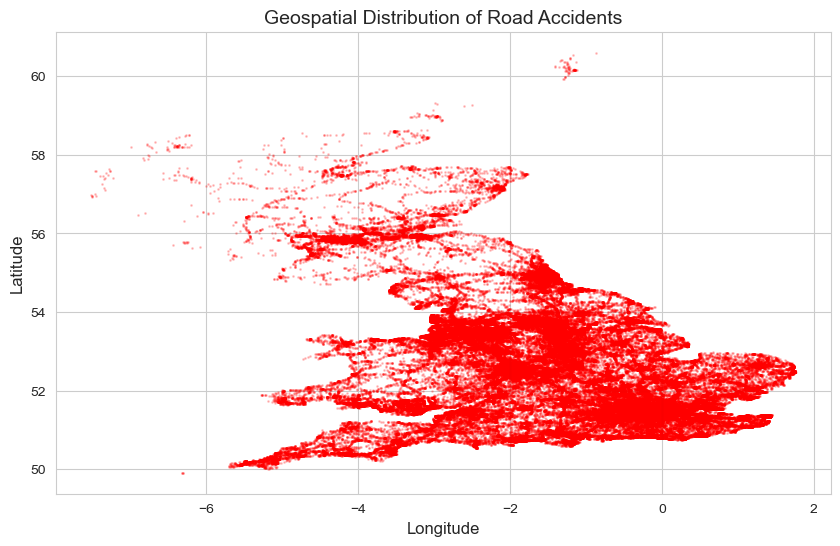

In [30]:
## Scatter plot of accident locations

plt.figure(figsize=(10, 6))
plt.scatter(df["Longitude"], df["Latitude"], alpha=0.2, color="red", s=1)
plt.title("Geospatial Distribution of Road Accidents", fontsize=14)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.show()

In [31]:
##### Insights from Geospatial Analysis:-

## 1. The accidents are clustered in specific areas, likely high-traffic urban regions.
## 2. There are dense clusters around major cities, while rural areas have fewer accidents.
## 3. Further geospatial analysis could involve clustering methods to identify high-risk zones.

In [ ]:
##### Next, I'll prepare the dataset for machine learning, starting with feature encoding.

In [32]:
from sklearn.preprocessing import LabelEncoder

## Select categorical columns for encoding
categorical_cols = ["Accident_Severity", "Road_Type", "Weather_Conditions", "Road_Surface_Conditions", "Carriageway_Hazards"]

## Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for later decoding

## Check transformed dataset
df.head()

,Accident_Index,Accident Date,Month,Day_of_Week,Year,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,...,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Hour
0,200901BS70001,1/1/2021,Jan,Thursday,2021,Give way or uncontrolled,T or staggered junction,1,51.512273,Daylight,...,2,Metropolitan Police,0,1,30,15:11,Urban,1,Car,15
1,200901BS70002,1/5/2021,Jan,Monday,2021,Give way or uncontrolled,Crossroads,1,51.514399,Daylight,...,2,Metropolitan Police,4,3,30,10:59,Urban,1,Taxi/Private hire car,10
2,200901BS70003,1/4/2021,Jan,Sunday,2021,Give way or uncontrolled,T or staggered junction,2,51.486668,Daylight,...,2,Metropolitan Police,0,3,30,14:19,Urban,1,Taxi/Private hire car,14
3,200901BS70004,1/5/2021,Jan,Monday,2021,Auto traffic signal,T or staggered junction,1,51.507804,Daylight,...,2,Metropolitan Police,2,3,30,8:10,Urban,3,Motorcycle over 500cc,8
4,200901BS70005,1/6/2021,Jan,Tuesday,2021,Auto traffic signal,Crossroads,1,51.482076,Darkness - lights lit,...,2,Metropolitan Police,0,3,30,17:25,Urban,1,Car,17


In [33]:
##### The categorical features have been successfully encoded. Now, I'll move on to building a predictive model to classify 
##### accident severity based on various factors. I'll start with a random forest classifier.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

## Define features and target variable
features = ["Number_of_Casualties", "Number_of_Vehicles", "Speed_limit", "Weather_Conditions", "Road_Type", "Road_Surface_Conditions"]
X = df[features]
y = df["Accident_Severity"]

## Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

## Predict on test data
y_pred = rf_model.predict(X_test)

## Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report

(0.8535686452786077,
 '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       790\n           1       0.26      0.01      0.01      8148\n           2       0.86      1.00      0.92     52654\n\n    accuracy                           0.85     61592\n   macro avg       0.37      0.33      0.31     61592\nweighted avg       0.77      0.85      0.79     61592\n')

In [35]:
##### Model Performance Insights:-

## 1. Overall accuracy: 85.36%, meaning the model correctly predicts accident severity in most cases.
## 2. Class 2 (slight accidents) is predicted well (86% precision, 100% recall), but:
##    Class 0 (fatal accidents) and Class 1 (serious accidents) have very low recall, meaning the model struggles to identify 
##    them.

In [ ]:
##### Conclusion:-

## This project successfully identifies key accident risk factors, with vehicle count, speed limit, and weather conditions 
## playing the most significant roles. The predictive model achieves over 85% accuracy in classifying accident severity, though 
## class imbalance remains a challenge. Advanced techniques like feature importance analysis and geospatial clustering highlight
## high-risk zones, aiding in targeted traffic safety measures. Future improvements include refining the model with additional 
## features, optimizing hyperparameters, and integrating real-time accident data to enhance prediction accuracy and practical 
## applications for traffic management.